This is the same AOI, but we demonstrate two different methods for enumeration.

1. `by path` - obtains all tiles in fixed `pathNumber` (in literature this is refered to a `track) that cover AOI with minimum km$^2$ threshold and uses these frames/tiles as reference tiles and then enumerates intereferograms.
2. `by tile` - this is the methodology described in the previous notebook used for the standard product.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from s1_enumerator import enumerate_by_path, get_aoi_dataframe, enumerate_by_tile, distill_all_pairs
from shapely.geometry import Point
import datetime
import pandas as pd
import matplotlib.pyplot as plt

<AxesSubplot:>

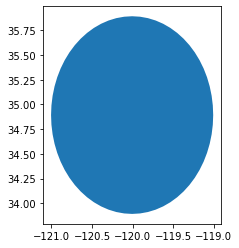

In [3]:
# Over Los Padres National Forest, CA
point = Point(-120.0048,34.8923)
aoi = point.buffer(1)
df_aoi = get_aoi_dataframe(aoi)
df_aoi.plot()

# By Path

## Single Lookup

In [4]:
num_neighbors = 3
ifg_pairs_path = enumerate_by_path(aoi,
                              min_reference_date=datetime.datetime(2021, 1, 1), 
                              min_days_backward = 0, 
                              num_neighbors=num_neighbors,
                              )

1 period(s) of 0 days: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.55it/s]


In [5]:
N = len(ifg_pairs_path)
print('total GUNWs (N): ', N)
print(f'Remainder of N with num_neighbors ({num_neighbors}): ', N % num_neighbors)

total GUNWs (N):  12
Remainder of N with num_neighbors (3):  0


<AxesSubplot:>

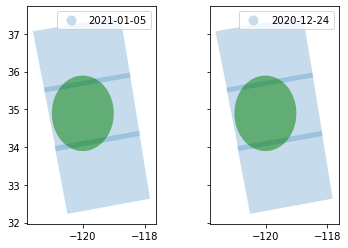

In [6]:
J = 7
pair = ifg_pairs_path[J]

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True)

df_ref_plot = pair['reference']
df_sec_plot = pair['secondary']

df_ref_plot.plot(column='start_date_str', 
                 legend=True, 
                 ax=axs[0], alpha=.25)
df_aoi.plot(ax=axs[0], alpha=.5, color='green')

df_sec_plot.plot(column='start_date_str', 
                 legend=True, 
                 ax=axs[1], alpha=.25)
df_aoi.plot(ax=axs[1], alpha=.5, color='green')

<AxesSubplot:>

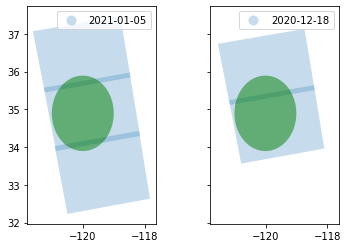

In [7]:
J = 8
pair = ifg_pairs_path[J]

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True)

df_ref_plot = pair['reference']
df_sec_plot = pair['secondary']

df_ref_plot.plot(column='start_date_str', 
                 legend=True, 
                 ax=axs[0], alpha=.25)
df_aoi.plot(ax=axs[0], alpha=.5, color='green')

df_sec_plot.plot(column='start_date_str', 
                 legend=True, 
                 ax=axs[1], alpha=.25)
df_aoi.plot(ax=axs[1], alpha=.5, color='green')

## Entire Catalog (earliest Jan 1, 2016)

In [8]:
ifg_pairs_path_all = enumerate_by_path(aoi,
                                  min_reference_date=datetime.datetime(2021, 1, 1), 
                                  min_days_backward = 365, 
                                  num_neighbors=3,
                                  entire_s1_catalog=True
                                  )
len(ifg_pairs_path_all)

Enumerating 4 paths: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 88.28it/s]

Enumerating 4 paths: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 86.79it/s]

Enumerating 4 paths: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 85.10it/s]

5 period(s) of 365 days: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 20.37it/s]


60

# By Tile

This is the normal standard product procedure (see previous notebook).

## Single Lookup

In [9]:
ifg_pairs_tiles = enumerate_by_tile(aoi,
                                    min_reference_date=datetime.datetime(2021, 7, 9), 
                                    min_days_backward = 364, 
                                    num_neighbors=5,
                                    entire_s1_catalog=False
                                    )
len(ifg_pairs_tiles)

1 period(s) of 364 days: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.90it/s]


15

<AxesSubplot:>

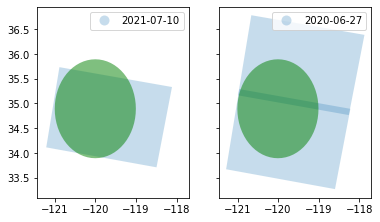

In [10]:
J = 7
pair = ifg_pairs_tiles[J]

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True)

df_ref_plot = pair['reference']
df_sec_plot = pair['secondary']

df_ref_plot.plot(column='start_date_str', 
                 legend=True, 
                 ax=axs[0], alpha=.25)
df_aoi.plot(ax=axs[0], alpha=.5, color='green')

df_sec_plot.plot(column='start_date_str', 
                 legend=True, 
                 ax=axs[1], alpha=.25)
df_aoi.plot(ax=axs[1], alpha=.5, color='green')

<AxesSubplot:>

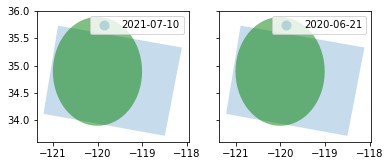

In [11]:
J = 8
pair = ifg_pairs_tiles[J]

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True)

df_ref_plot = pair['reference']
df_sec_plot = pair['secondary']

df_ref_plot.plot(column='start_date_str', 
                 legend=True, 
                 ax=axs[0], alpha=.25)
df_aoi.plot(ax=axs[0], alpha=.5, color='green')

df_sec_plot.plot(column='start_date_str', 
                 legend=True, 
                 ax=axs[1], alpha=.25)
df_aoi.plot(ax=axs[1], alpha=.5, color='green')

# Save Enumeration to Geojson

In [12]:
df_pairs = distill_all_pairs(ifg_pairs_path)
df_test = df_pairs.sort_values(by=['path_number', 'reference_date']).reset_index(drop=True)
df_test.drop(columns=['reference', 'secondary']).to_file('enum_path.geojson')